# RMSE Evolution

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from reco_systems.filter import filter_df
from reco_systems.CF_knn import calc_similarity_matrix, get_KNN
from reco_systems.user_game_matrix import get_matrix_user_game
from reco_systems.evaluation import *

In [2]:
folder = "database_cleaned"
avis_clean  = pd.read_csv(f"{folder}/avis_clean.csv", index_col=0)
jeux_clean  = pd.read_csv(f"{folder}/jeux_clean.csv", index_col=0)
users       = pd.read_csv(f"{folder}/users.csv", names=["Username", "User id"])

In [3]:
# Filter for min_reviews for users & games
min_reviews = 10
rev_filter = filter_df(avis_clean, min_reviews)

11201 10549
2086 2464
1800 2399
1792 2397
1791 2396


In [4]:
# generate user-game matrix
matrix_ratings, mask_ratings, users_table, games_table = get_matrix_user_game(rev_filter)

In [5]:
# cosine similarity matrix, set k = sqrt(nb users)
cos_sim_matrix = calc_similarity_matrix(matrix_ratings, mask_ratings, "cos")
k = int(np.sqrt(cos_sim_matrix.shape[0]))
cos_sim_matrix

array([[0.        , 0.92389562, 0.83575481, ..., 0.9283455 , 0.95303296,
        1.        ],
       [0.92389562, 0.        , 0.71397509, ..., 1.        , 0.98901438,
        0.99191515],
       [0.83575481, 0.71397509, 0.        , ..., 0.98078965, 0.91075622,
        1.        ],
       ...,
       [0.9283455 , 1.        , 0.98078965, ..., 0.        , 1.        ,
        1.        ],
       [0.95303296, 0.98901438, 0.91075622, ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.99191515, 1.        , ..., 1.        , 1.        ,
        0.        ]], shape=(1791, 1791))

In [6]:
 # Create association - User matrix index - User real id - Count reviews

users_ids =  rev_filter[["User id", "Game id"]].groupby("User id", as_index=True).count()
assoc = users_table.to_frame().merge(users_ids, left_on="User id", right_index=True).reset_index()
assoc.columns = ["User index", "User id", "Count reviews"]
assoc 

,User index,User id,Count reviews
0,0,0,38
1,1,1,724
2,2,2,330
3,3,3,255
4,4,4,12
...,...,...,...
1786,1786,9066,16
1787,1787,9433,20
1788,1788,9583,13
1789,1789,9596,15


In [ ]:
np.random.seed(2)

df = calc_RMSE_MAE_mean(np.array([8,9,10,11,12,13,14,15]),assoc,200,1000,matrix_ratings,mask_ratings,cos_sim_matrix,dist_type="cos")
df

8
9
10
11
12
13
14
15


[Text(0, 0, ''),
 Text(0, 1, ''),
 Text(0, 2, ''),
 Text(0, 3, ''),
 Text(0, 4, ''),
 Text(0, 5, ''),
 Text(0, 6, ''),
 Text(0, 7, ''),
 Text(0, 8, ''),
 Text(0, 9, ''),
 Text(0, 10, ''),
 Text(0, 11, ''),
 Text(0, 12, ''),
 Text(0, 13, ''),
 Text(0, 14, ''),
 Text(0, 15, ''),
 Text(0, 16, ''),
 Text(0, 17, ''),
 Text(0, 18, ''),
 Text(0, 19, ''),
 Text(0, 20, ''),
 Text(0, 21, ''),
 Text(0, 22, ''),
 Text(0, 23, ''),
 Text(0, 24, ''),
 Text(0, 25, ''),
 Text(0, 26, ''),
 Text(0, 27, ''),
 Text(0, 28, ''),
 Text(0, 29, ''),
 Text(0, 30, ''),
 Text(0, 31, ''),
 Text(0, 32, ''),
 Text(0, 33, ''),
 Text(0, 34, ''),
 Text(0, 35, ''),
 Text(0, 36, ''),
 Text(0, 37, ''),
 Text(0, 38, ''),
 Text(0, 39, ''),
 Text(0, 40, ''),
 Text(0, 41, ''),
 Text(0, 42, ''),
 Text(0, 43, ''),
 Text(0, 44, ''),
 Text(0, 45, ''),
 Text(0, 46, ''),
 Text(0, 47, ''),
 Text(0, 48, ''),
 Text(0, 49, ''),
 Text(0, 50, ''),
 Text(0, 51, ''),
 Text(0, 52, ''),
 Text(0, 53, ''),
 Text(0, 54, ''),
 Text(0, 55, ''),
 T

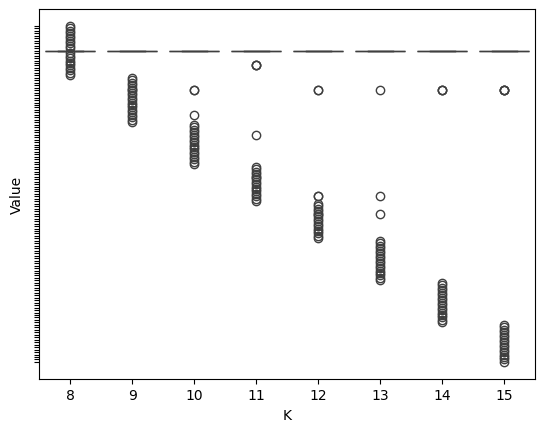

In [ ]:
gfg = sns.boxplot(df.dropna(),x="K",y="Value")
gfg.set_yticklabels([])
